# Avellaneda-Stoikov Model - Part2

```{note}
We now turn to an agent who can trade in the stock
through limit orders that he sets around the mid-price
given by $\mathrm{d}S_{u} = \sigma\mathrm{d}W_{u}$.
```

## Limit order

The agent quotes the bid price $p^{b}$ and the ask price $p^{a}$, and is committed to respectively buy and sell one
share of stock at these prices. These limit orders $p^b$ and $p^a$ can be
continuously updated at no cost.The distances are:

$$\delta^{b} = s - p^{b},$$

$$\delta^{a} = p^{a} - s.$$

when a large market order to buy $Q$ stocks arrives, the $Q$ limit orders with the lowest ask
prices will automatically execute. If $p^{Q}$ is the price of the highest
limit order executed in this trade, we define

$$\Delta{p} = p^{Q} - s$$

to be the temporary market impact of the trade of size $Q$. If our agent’s limit order is within the range of this market
order, i.e. if $\delta^{a}<\Delta{p}$, his limit order will be executed.

We assume that market buy orders will ‘lift’ our agent’s
sell limit orders at Poisson rate $\lambda^{a}(\delta^{a})$, a decreasing
function of $\delta^{a}$. Likewise, orders to sell stock will ‘hit’ the
agent’s buy limit order at Poisson rate $\lambda^{b}(\delta^{b})$, a decreasing
function of $\delta^{b}$. Intuitively, the further away from the midprice
the agent positions his quotes, the less often he will
receive buy and sell orders.

```{tip}
![](images/as3.png)
```

```{tip}
![](images/as4.png)
```

![](images/as2.svg)

The wealth and inventory are now stochastic and
depend on the arrival of market sell and buy orders.
Indeed, the wealth in cash jumps every time there is a buy
or sell order

$$\mathrm{d}X_{t} = p^{a}\mathrm{d}N_{t}^{a} - p^{b}\mathrm{d}N_{t}^{b}$$

where $N_{t}^{b}$ is the amount of stocks bought by the agent and
$N_{t}^{a}$ is the amount of stocks sold. $N_{t}^{b}$ and $N_{t}^{a}$ are Poisson
processes with intensities $\lambda^{b}$ and $\lambda^{a}$. The number of stocks
held at time $t$ is

$$q_{t} = N_{t}^{b} - N_{t}^{a}.$$

The objective of the agent who can set limit orders is:

$$u(s, x, q, t) = \max_{\delta^{a},\delta^{b}}\mathbb{E}_{t}[-\exp(-\gamma(X_{T} + q_{T}S_{T}))]$$

Before turning to the solution of this problem, we
consider some realistic functional forms for the intensities $\lambda^{a}(\delta^{a})$ and $\lambda^{b}(\delta^{b})$ inspired by recent results in the
econophysics literature.

```{caution}
$\delta^{a}$ and $\delta^{b}$ are time and state dependent.
```

## The trading intensity

One of the main objectives of the econophysics community
has been to describe the laws governing the
microstructure of financial markets. Here, we will be
focusing on the results which address the Poisson
intensity $\lambda$ with which a limit order will be executed as
a function of its distance $\delta$ to the mid-price. In order to
quantify this, we need to know statistics on:

1. the overall
frequency of market orders,
2. the distribution of their
size,
3. the temporary impact of a large market
order.

For simplicity, we assume a constant frequency $\Lambda$ of
market buy or sell orders.

The distribution of the size of market orders has been
found by several studies to obey a power law. In other
words, the density of market order size is

$$f^{Q}(x)\propto x^{-1-\alpha}\quad\text{note: }\propto\text{ means proportion to}$$

for large $x$, with $\alpha=1.53$ for US stocks.

On the statistics of the market impact in the econophysics literature. Some authors find that the change in price $\Delta{p}$ following a market order of size $Q$ is given by

$$\Delta{p}\propto Q^{\beta},$$

Some authors find a better fit to the function

$$\Delta{p}\propto\ln(Q).$$

Aggregating this information, we may derive the
Poisson intensity at which our agent’s orders are
executed:

$$
\begin{aligned}
\lambda(\delta) &= \Lambda P(\Delta p>\delta) \\
&= \Lambda P(\ln(Q)>K\delta) \\
&= \Lambda P(Q>\exp(K\delta)) \\
&= \Lambda \int_{\exp(K\delta)}^{\infty}x^{-1-\alpha}\mathrm{d}x\\
&= A\exp(-k\delta)
\end{aligned}
$$

where $A=\Lambda/\alpha$ and $k=\alpha K$.

In [1]:
from utils import *

lst = read_jsonl('2024-05-29.json')
show_list(lst)

86400
[1716912000000, '3861.10000000', '3861.11000000', '3861.10000000', '3861.11000000', '0.36010000', 1716912000999, '1390.38375800', 21, '0.16480000', '636.31092800', '0']


In [2]:
import numpy as np


def get_probs(diffs):
    result = []
    for diff in diffs:
        cnt = 0
        for item in lst:
            mid, high, low = float(item[1]), float(item[2]), float(item[3])
            if diff >= 0 and high - mid > diff:
                cnt += 1
            elif diff < 0 and low - mid < diff:
                cnt += 1
        result.append(cnt/len(lst))
    return np.array(result)

x = np.arange(0, 2, 0.01)
pos = get_probs(x)
neg = get_probs(-x)

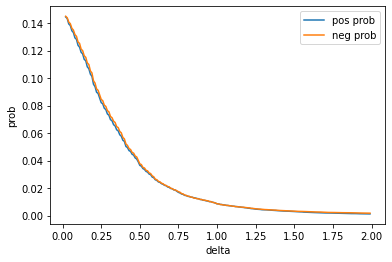

In [3]:
import matplotlib.pyplot as plt

plt.plot(x[2:], pos[2:], label='pos prob')
plt.plot(x[2:], neg[2:], label='neg prob')
plt.legend()
plt.xlabel('delta')
plt.ylabel('prob')
plt.show()

In [4]:
nums = (pos[2:] + neg[2:]) / 2

A = 0.16590499485851926, k = 2.8564179229240696


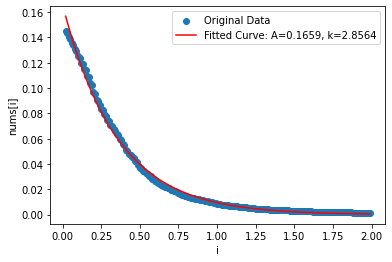

In [5]:
from scipy.optimize import curve_fit

# 定义拟合函数
def exponential_func(delta, A, k):
    return A * np.exp(-k * delta)

# 使用curve_fit进行拟合
params, covariance = curve_fit(exponential_func, x[2:], nums)

# 获取拟合参数
A, k = params

print(f"A = {A}, k = {k}")

# 绘制原始数据和拟合曲线
plt.scatter(x[2:], nums, label="Original Data")
plt.plot(x[2:], exponential_func(x[2:], A, k), label=f"Fitted Curve: A={A:.4f}, k={k:.4f}", color='red')
plt.xlabel("i")
plt.ylabel("nums[i]")
plt.legend()
plt.show()